<a href="https://colab.research.google.com/github/SudeepSarkar/sarkar-computer-vision-lectures/blob/main/CV_Module_1_1_Images_As_Arrays.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Copyright (c) 2021, 2022, Sudeep Sarkar, University of South Florida, Tampa

#Goal

In this module, we will introduce image representations using arrays and how you can manipulate the value of the arrays to change the image appearance. You will learn through actual code how to use image thresholding and simple logical operations to separate text in images taken from printed pages. This separation of text characters from the page is something that all text-scanning apps do. In the end, there is an activity whose result you will have to submit on canvas as homework.

# Tools used

##Google Colab

We will use Colob Notebooks (Jupyter-styled)  in this course that we will run on Google Colab, with free GPU access. Please set up your own Colab account using your Gmail address, and I would advise using a newly set up account different from your personal account for privacy and security reasons. We will mount the associated Google drive with your account to Colab for easy file access, and instructions for that will come later. For now, read the information on the page at https://colab.research.google.com/ and execute the code cells with the play button.

During the lectures, I will be doing code demonstrations that you can replicate in your Colab account on your laptop.

## Numpy

"NumPy is the fundamental package for scientific computing in Python. It is a Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more. At the core of the NumPy package, is the ndarray object."

https://numpy.org/doc/stable/user/whatisnumpy.html

You can learn the basics of numpy from https://numpy.org/doc/stable/user/basics.html




##Matplot

Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.

https://matplotlib.org/

## Scikit-image

scikit-image is a collection of algorithms for image processing. It is available free of charge and free of restriction. 

https://scikit-image.org/

https://scikit-image.org/docs/dev/user_guide/getting_started.html

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

np.set_printoptions(precision=2)

## Code: Mount Google drive to access your file structure

* You can store your input and output files on your Google drive so that they persist across sessions.

* From Canvas, download the zip-file of images we will use in this course into your Google drive. Store them under the directory:  

        MyDrive/Colab Notebooks/CAP 6415 Computer Vision Online/data/

* You can do this upload from the web or from your desktop. You can use the desktop version of Google drive and mount it on your laptop to have local access to the gdrive files. See https://www.google.com/drive/download/

* Below is the code to mount your Google Drive onto this Colab instance. You will have to do this every time you start Colab as you get a new Colab session with a new file structure. This means that anything you save *locally* on Colab is lost, and you have to save it in your Google drive to access it across sessions. 


In [ ]:
## Mount Google drive
from google.colab import drive
drive.mount('/content/drive')
data_dir = '/content/drive/MyDrive/Colab Notebooks/CAP 6415 Computer Vision Online/data/'

!ls "$data_dir"

Mounted at /content/drive
 0005_Walking001.xlsx			     left01.jpg
 0008_ChaCha001.xlsx			     left02.jpg
 2011_09_26_drive_0048_sync		     left03.jpg
 2011_09_26_drive_0048_sync.zip		     left04.jpg
 20211003_082148.jpg			     left05.jpg
 20211003_082201.jpg			     left06.jpg
 apple.jpg				     left07.jpg
'Armes 1.png'				     left08.jpg
'Armes 2.png'				     left09.jpg
 blog_danforth_monica_mural_panorama.jpg     left11.jpg
 blog_monica_mural_brown_white.jpg	     left12.jpg
 blog_monica_mural_fish_tree_windows1.jpg    lizard.jpg
'cats and dogs.jpg'			     MOT16-08-raw.webm
 convenience-store-cereal01.jpg		     mountain_peak_1.png
 declaration_of_independence_stone_630.jpg   mountain_peak_2.png
 Fig3_3a.jpg				     parking_lot_meva_1.png
 Fig3_4a.jpg				     parking_lot_meva_2.png
 Fig3_4c.jpg				     parking_lot_meva_3.png
 hawaii.png				    'Road Signs Kaggle'
 house_1.png				     semper
 house_2.png				    'Superbowl 2021_1.png'
 house_facade.png			    'Superbowl 2021_2.png'
 IMG_01

# Basics of images

In the this and next units we will introduce to you how images are represented using arrays and how you can manipulate the value of the arrays to change the image appearance. You will learn through actual code how image thresholding and simple logical operations can be used to separate text in images taken of printed pages. This is something at all text scanning apps do.

## Image formation

* There is the **photometric** aspect, and then there is the **geometric** aspect.

* The photometric aspects as to do with the brightness and color of the image, which is a function of the light source, surface characteristics (shiny, glossy, matte), and surface orientation with respect to the camera.

* The image is a 2D structure, whereas the world is 3D. We **lose** a dimension of the world when we capture an image! This dimensional loss leads to artifacts such as parallel lines in the world (think rail lines) that do not appears as parallels in images. We will study these aspects in the following lecture.

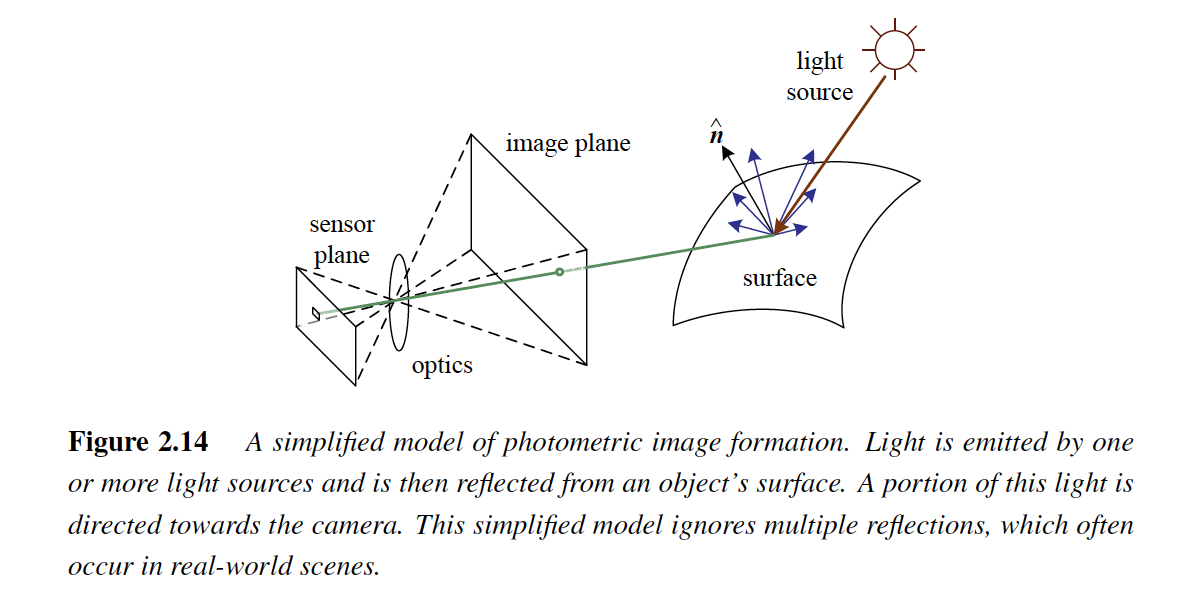

The above figure is from the textbook Computer Vision: Algorithms and Applications 2nd Edition Richard Szeliski - (c) 2022 Springer

## Code: Read image

* An image is represented in a computer as an array of **pixels** -- a three-dimensional array (row, col, color).
* Color at a pixel is captured by three numbers that represent the number of primary colors - red, blue, green.



 Size of color image array (#row, #col, rgb): (612, 612, 3) Data type: uint8

 Pixel values at row 200 and col 200: (red, green, blue)
 [168  45  38]

 Pixel values of a 2 by 2 block
 [[[168  45  38]
  [152  34  24]]

 [[143  20  13]
  [176  58  46]]]


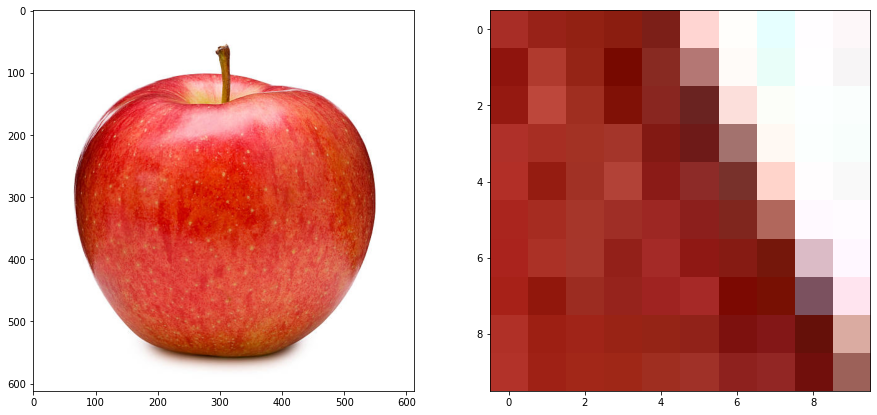

In [ ]:
'''
Read in an image, 
'''
# Load an color image 
imfile_name = data_dir+'apple.jpg'  

color_img = io.imread(imfile_name)
print ('\n Size of color image array (#row, #col, rgb):', color_img.shape, 'Data type:', color_img.dtype)
print('\n Pixel values at row 200 and col 200: (red, green, blue)\n', color_img[200,520,:])
print('\n Pixel values of a 2 by 2 block\n', color_img[200:202,520:522,:])

# plot the image on screen and other plots
plt.figure(figsize=(15,10))

plt.subplot(1,2,1)
plt.imshow(color_img);

plt.subplot(1,2,2)
plt.imshow(color_img[200:210,520:530,:]);

## Code: Color channels


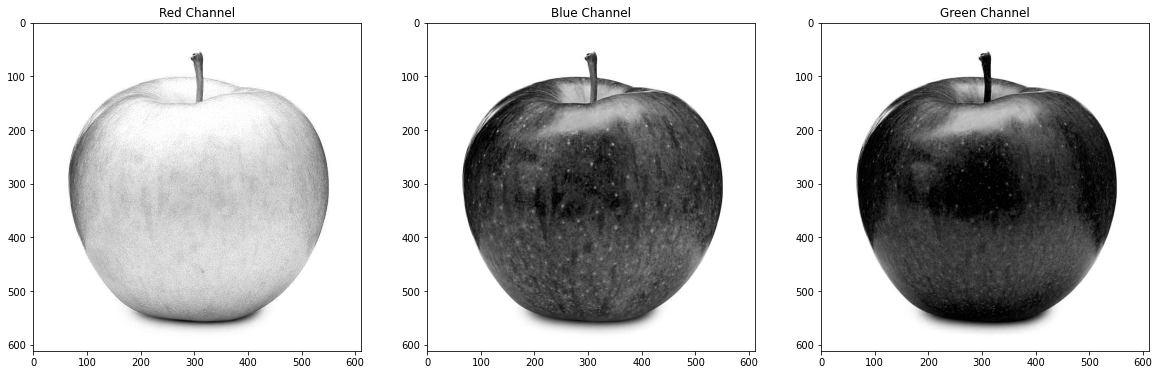

In [ ]:
# Show the blue, green, red channels

# Example of how to create plots
# using the variable axs for multiple Axes
fig, axs = plt.subplots(1, 3)
fig.set_size_inches (20, 10)

axs[0].imshow(color_img[:,:,0], 'gray');
axs[0].set_title('Red Channel')

axs[1].imshow(color_img[:,:,1], 'gray');
axs[1].set_title('Blue Channel')

axs[2].imshow(color_img[:,:,2], 'gray');
axs[2].set_title('Green Channel');



## Code: Gray level image



 Size of gray level image: (612, 612) Data type: uint8


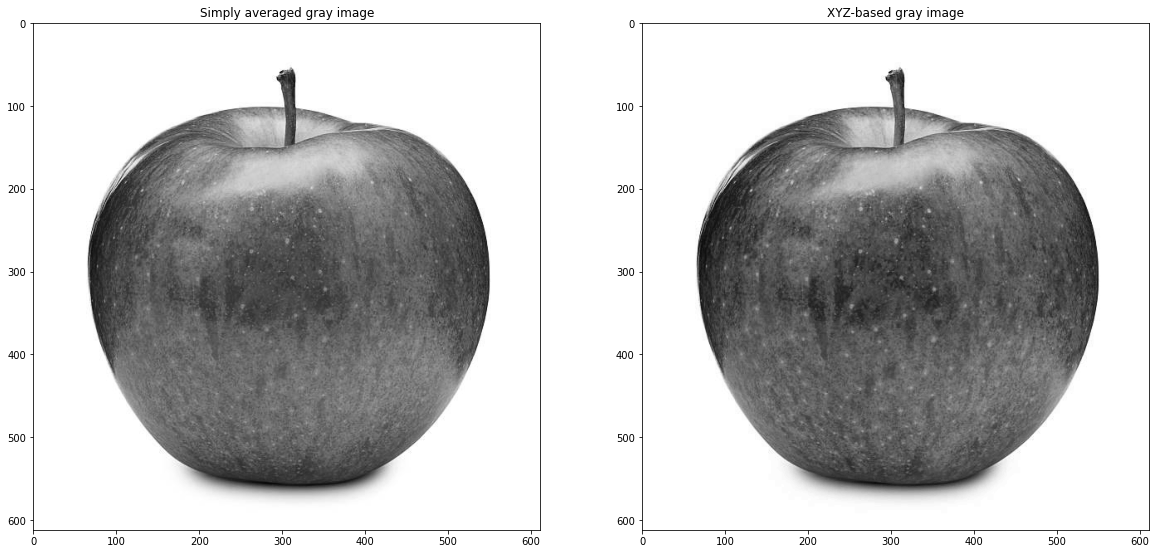

In [ ]:
'''
Gray level image = average of the 3 color channels
'''
gray_img = (color_img[:,:,0].astype(float) + color_img[:,:,1].astype(float) + color_img[:,:,2].astype(float))/3
# What is the "astype" extension doing? Why do we need it?
gray_img = gray_img.astype (np.uint8)

print('\n Size of gray level image:', gray_img.shape, 'Data type:', gray_img.dtype)

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)
axs[0].imshow(gray_img, 'gray');
axs[0].set_title('Simply averaged gray image');

# The following combination of RGB better represents what human's perceive as gray level in a color image.
# Y = 0.2125 R + 0.7154 G + 0.0721 B
# You can learn more about color perception at http://poynton.ca/PDFs/ColorFAQ.pdf 
#
# Color perception and representation in images is not a simple matter. There are books written on this topic.
# See for example, https://en.wikipedia.org/wiki/Color_vision
#
# RGB is not the best representation.

xyz_gray_img = (0.2125 * color_img[:,:,0].astype(float) + 0.7154 * color_img[:,:,1].astype(float) + 0.0721 * color_img[:,:,2].astype(float))/3
xyz_gray_img = xyz_gray_img.astype (np.uint8)

axs[1].imshow(xyz_gray_img, 'gray');
axs[1].set_title('XYZ-based gray image');


# Processing Document Images


Gray level image array: 
 [[0.91 0.91 0.92 ... 0.9  0.9  0.9 ]
 [0.91 0.91 0.9  ... 0.9  0.9  0.9 ]
 [0.91 0.91 0.88 ... 0.9  0.9  0.9 ]
 ...
 [0.91 0.91 0.91 ... 0.9  0.9  0.9 ]
 [0.91 0.91 0.91 ... 0.9  0.9  0.91]
 [0.91 0.91 0.91 ... 0.91 0.91 0.9 ]]


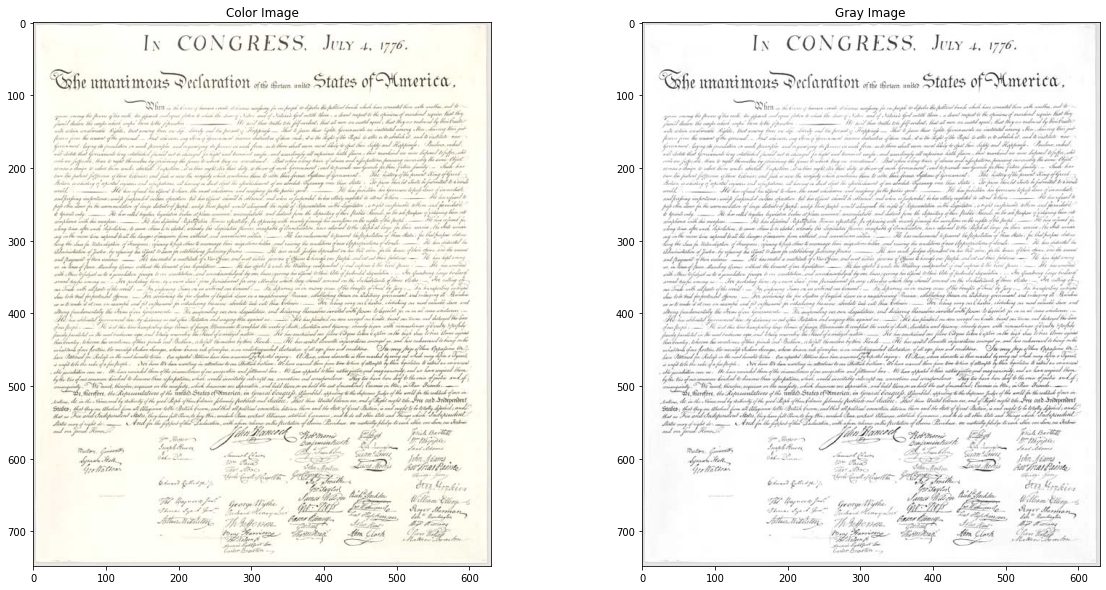

In [ ]:
imfile_name = data_dir + 'declaration_of_independence_stone_630.jpg'
doi = io.imread(imfile_name)


from skimage import color as change # contains function to change between color spaces

gdoi = change.rgb2gray(doi)
print('Gray level image array: \n', gdoi)

'''
# The rgb2gray function turns rgb image to gray, however, note the range. It is from 0 to 1.
# This mapping of the gray level intensity to the range 0 and 1 is specific to the function
# rgb2gray used here. There might be other image processing packages that keep the range to be
# between 0 and 255. You have to be careful about this aspects of transformation functions, 
# i.e. range over which the output values are mapped. Typically, this range is (0, 1) or (0, 255).
'''

fig, axs = plt.subplots(1, 2)
fig.set_size_inches (20, 10)

axs[0].imshow(doi);
axs[0].set_title('Color Image');

axs[1].imshow(gdoi, 'gray');
axs[1].set_title('Gray Image');


## Code: Image Thresholding


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


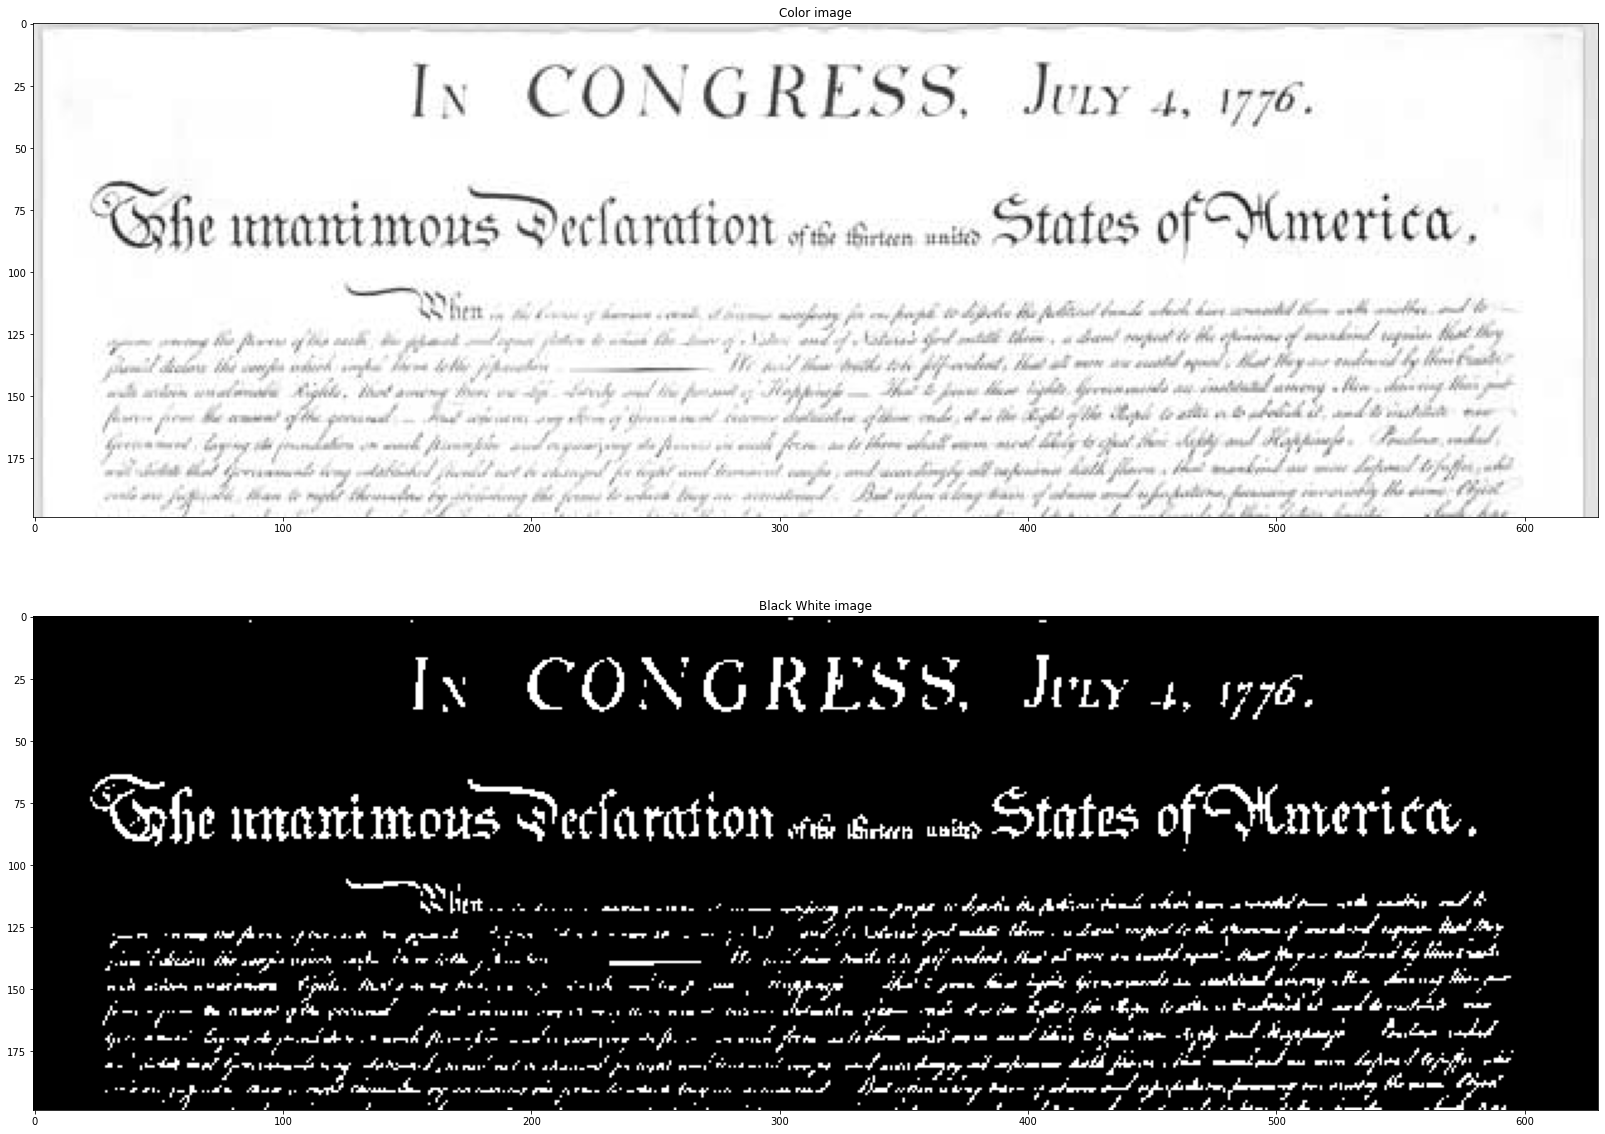

In [ ]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches (40, 20)

axs[0].imshow(gdoi[1:200,:], 'gray');
axs[0].set_title('Color image');

'''
Thresholding
'''
bw_doi = np.where( gdoi > 0.8, 0, 1)

print (bw_doi)
axs[1].imshow(bw_doi[1:200,:], 'gray');
axs[1].set_title('Black White image');

## Code: Image histogram

The image histogram is the plot of the pixel count of different values.

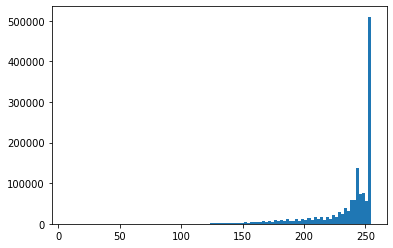

In [ ]:
ax = plt.hist(doi.ravel(), bins = 100)

## Code: Sum foreground pixels in each row

* We plot of the number of pixels in the thresholded image with a value of 255 along each row.

* We can use this signal to break up the document into lines. 

* Idea: Look for the **local** minima. How would you detect them?

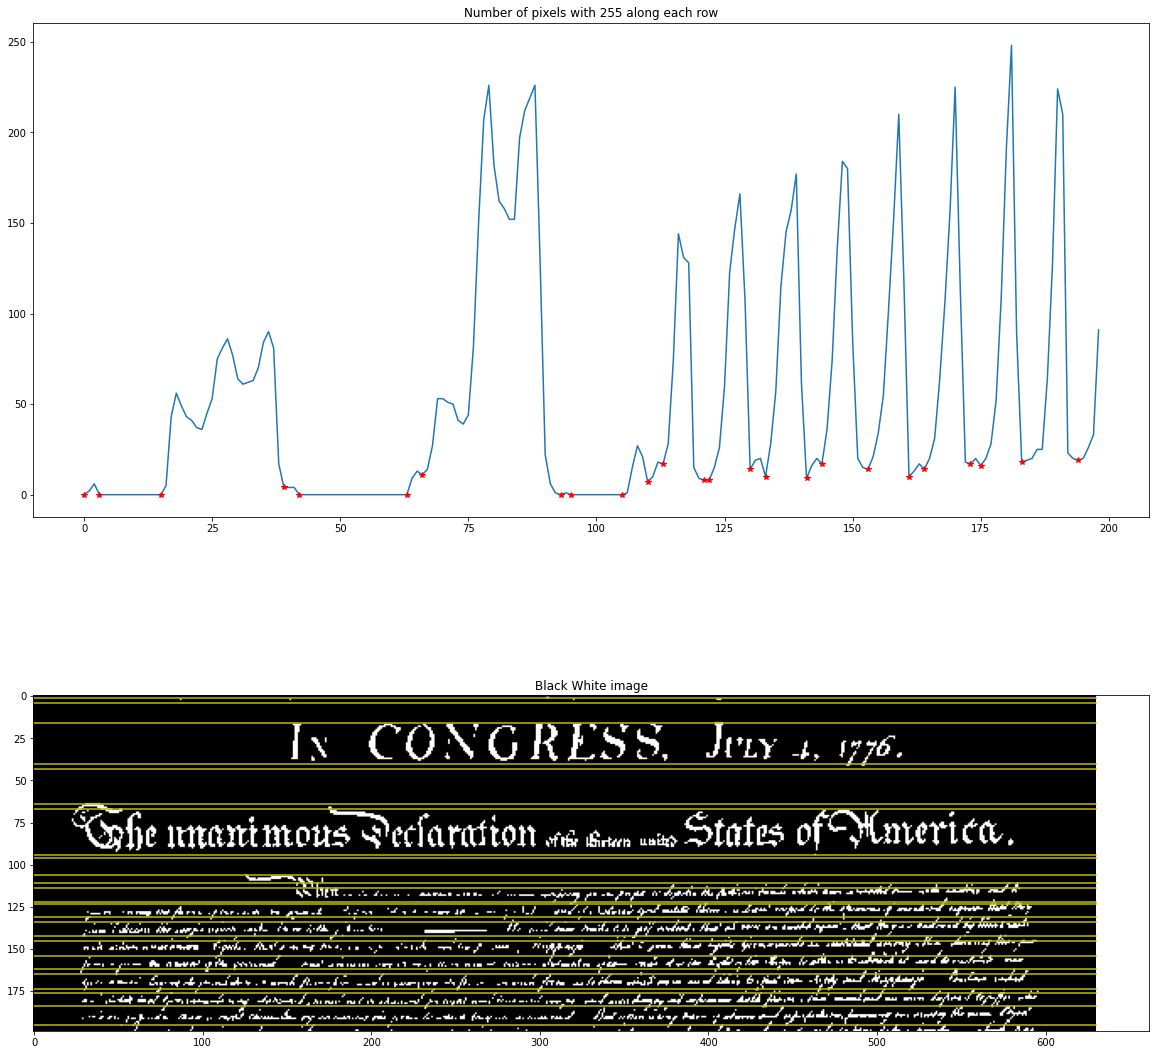

In [ ]:
fig, axs = plt.subplots(2, 1)
fig.set_size_inches (20, 20)

num_255_row = np.sum(bw_doi, axis=1)

axs[0].plot(num_255_row[1:200]);
axs[0].set_title('Number of pixels with 255 along each row');
axs[1].imshow(bw_doi[1:200,:], 'gray');
axs[1].set_title('Black White image');

minima_locations = np.zeros(num_255_row.shape)
for i in range(1, 200) :
    if (((num_255_row[i] <= num_255_row[i-1]) and (num_255_row[i] < num_255_row[i+1])) or
        ((num_255_row[i] < num_255_row[i-1]) and (num_255_row[i] <= num_255_row[i+1]))):

        if (num_255_row[i] < 25) :
            axs[0].plot (i-1, num_255_row[i], 'r*')
# Why are we using i-1 to mark the minima location rather than i in the plot? 
# Ans: The plot starts at horizontal axis = 1 not 0.
            axs[1].plot(np.array([0, bw_doi.shape[1]]), np.array([i, i]), 'y')
            minima_locations[i] = 1



# Homework: line segmentation in documents

* Notice that in the output above, the bottom line for the text "In Congress July 4, 1976" is not detected. Can you find other lines of text with this effect?

* Experiment with either having or not having "=" in the four conditions in lines 13 and 14 of the above code (the if-condition) 

        if (((num_255_row[i] <= num_255_row[i-1]) and (num_255_row[i] < num_255_row[i+1])) or
        ((num_255_row[i] < -num_255_row[i-1]) and (num_255_row[i] <= num_255_row[i+1]))):

and observe their effect on the demarcation of the text lines. There will be 16 ($=2^4$)such combinations.

* Screencapture each of the 16 outputs. Put it in a Word file. Turn it into a pdf file and upload it on Canvas.

* Notice how none of the combinations properly give us all the line demarcations cleanly. For some text lines, the top or the bottom are still missing. For some combinations, many spurious boundaries are marked.

* How would you fix it? Hint: you will have to add another combination.



# Use Case: Turn Scanned Document into Text

* Text detection and recognition in scanned documents have many uses, e.g., digital library initiatives. There is a need to create searchable texts from scanned old books and manuscripts, most of which are now hidden from the current generation, who rely on just digitized information. 

* Some advanced camera-based document scanning apps on your phone allow you to create an editable text version of the imaged pages. These apps are essentially performing text detection and recognition. 

* What you have seen is just the first step towards building a complete algorithm -- the line detection step. After detecting each line, we again break each line into words using the gap signatures. Once each word on the page is outlined, we send the sub-image to an Optical Character Recognition (OCR) algorithm to classify it into a word-text representation.

* Here are examples of available software that you can play with

> > https://cloud.google.com/vision/docs/ocr

* In general, creating editable text from scanned **typed** or **printed** documents is more straightforward than turning scanned **handwritten** documents into text. 
